<p><font size="6"><b>Projet 5 - Openclassrooms. Data Science </b></font></p>


<p><font size="5"><b>Segmentez des clients d'un site e-commerces </b></font></p>

<p><font size="4"><b>*Partie 1: Préparation et nettoyage des données  </b></font></p>




Source de données : https://www.kaggle.com/olistbr/brazilian-ecommerce

*© 2021, Ilham Noumir  (mailto:noumir.ilham@gmail.com)

## <div class="alert alert-info"> 0. Présentation du projet  : </div> 

######  Description Générale : 
* Olist c’est une solution de vente sur les marketplaces en ligne .
* Olist souhaite réaliser une segmentation des clients qui sera destinée aux campagnes de communication.

######   Objectifs : 
* Comprendre les différents types d’utilisateurs
* Fournir à l’équipe marketing une description actionable
* Proposition de contrat de maintenance  basée sur une analyse de la stabilité des segments au cours du temps.

######   Missions : 
* La segmentation proposée doit être exploitable et facile d’utilisation pour l’équipe marketing.
* Evaluation de la fréquence à laquelle la segmentation doit être mise à jour, afin de pouvoir effectuer un devis de contrat de maintenance.
* Le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

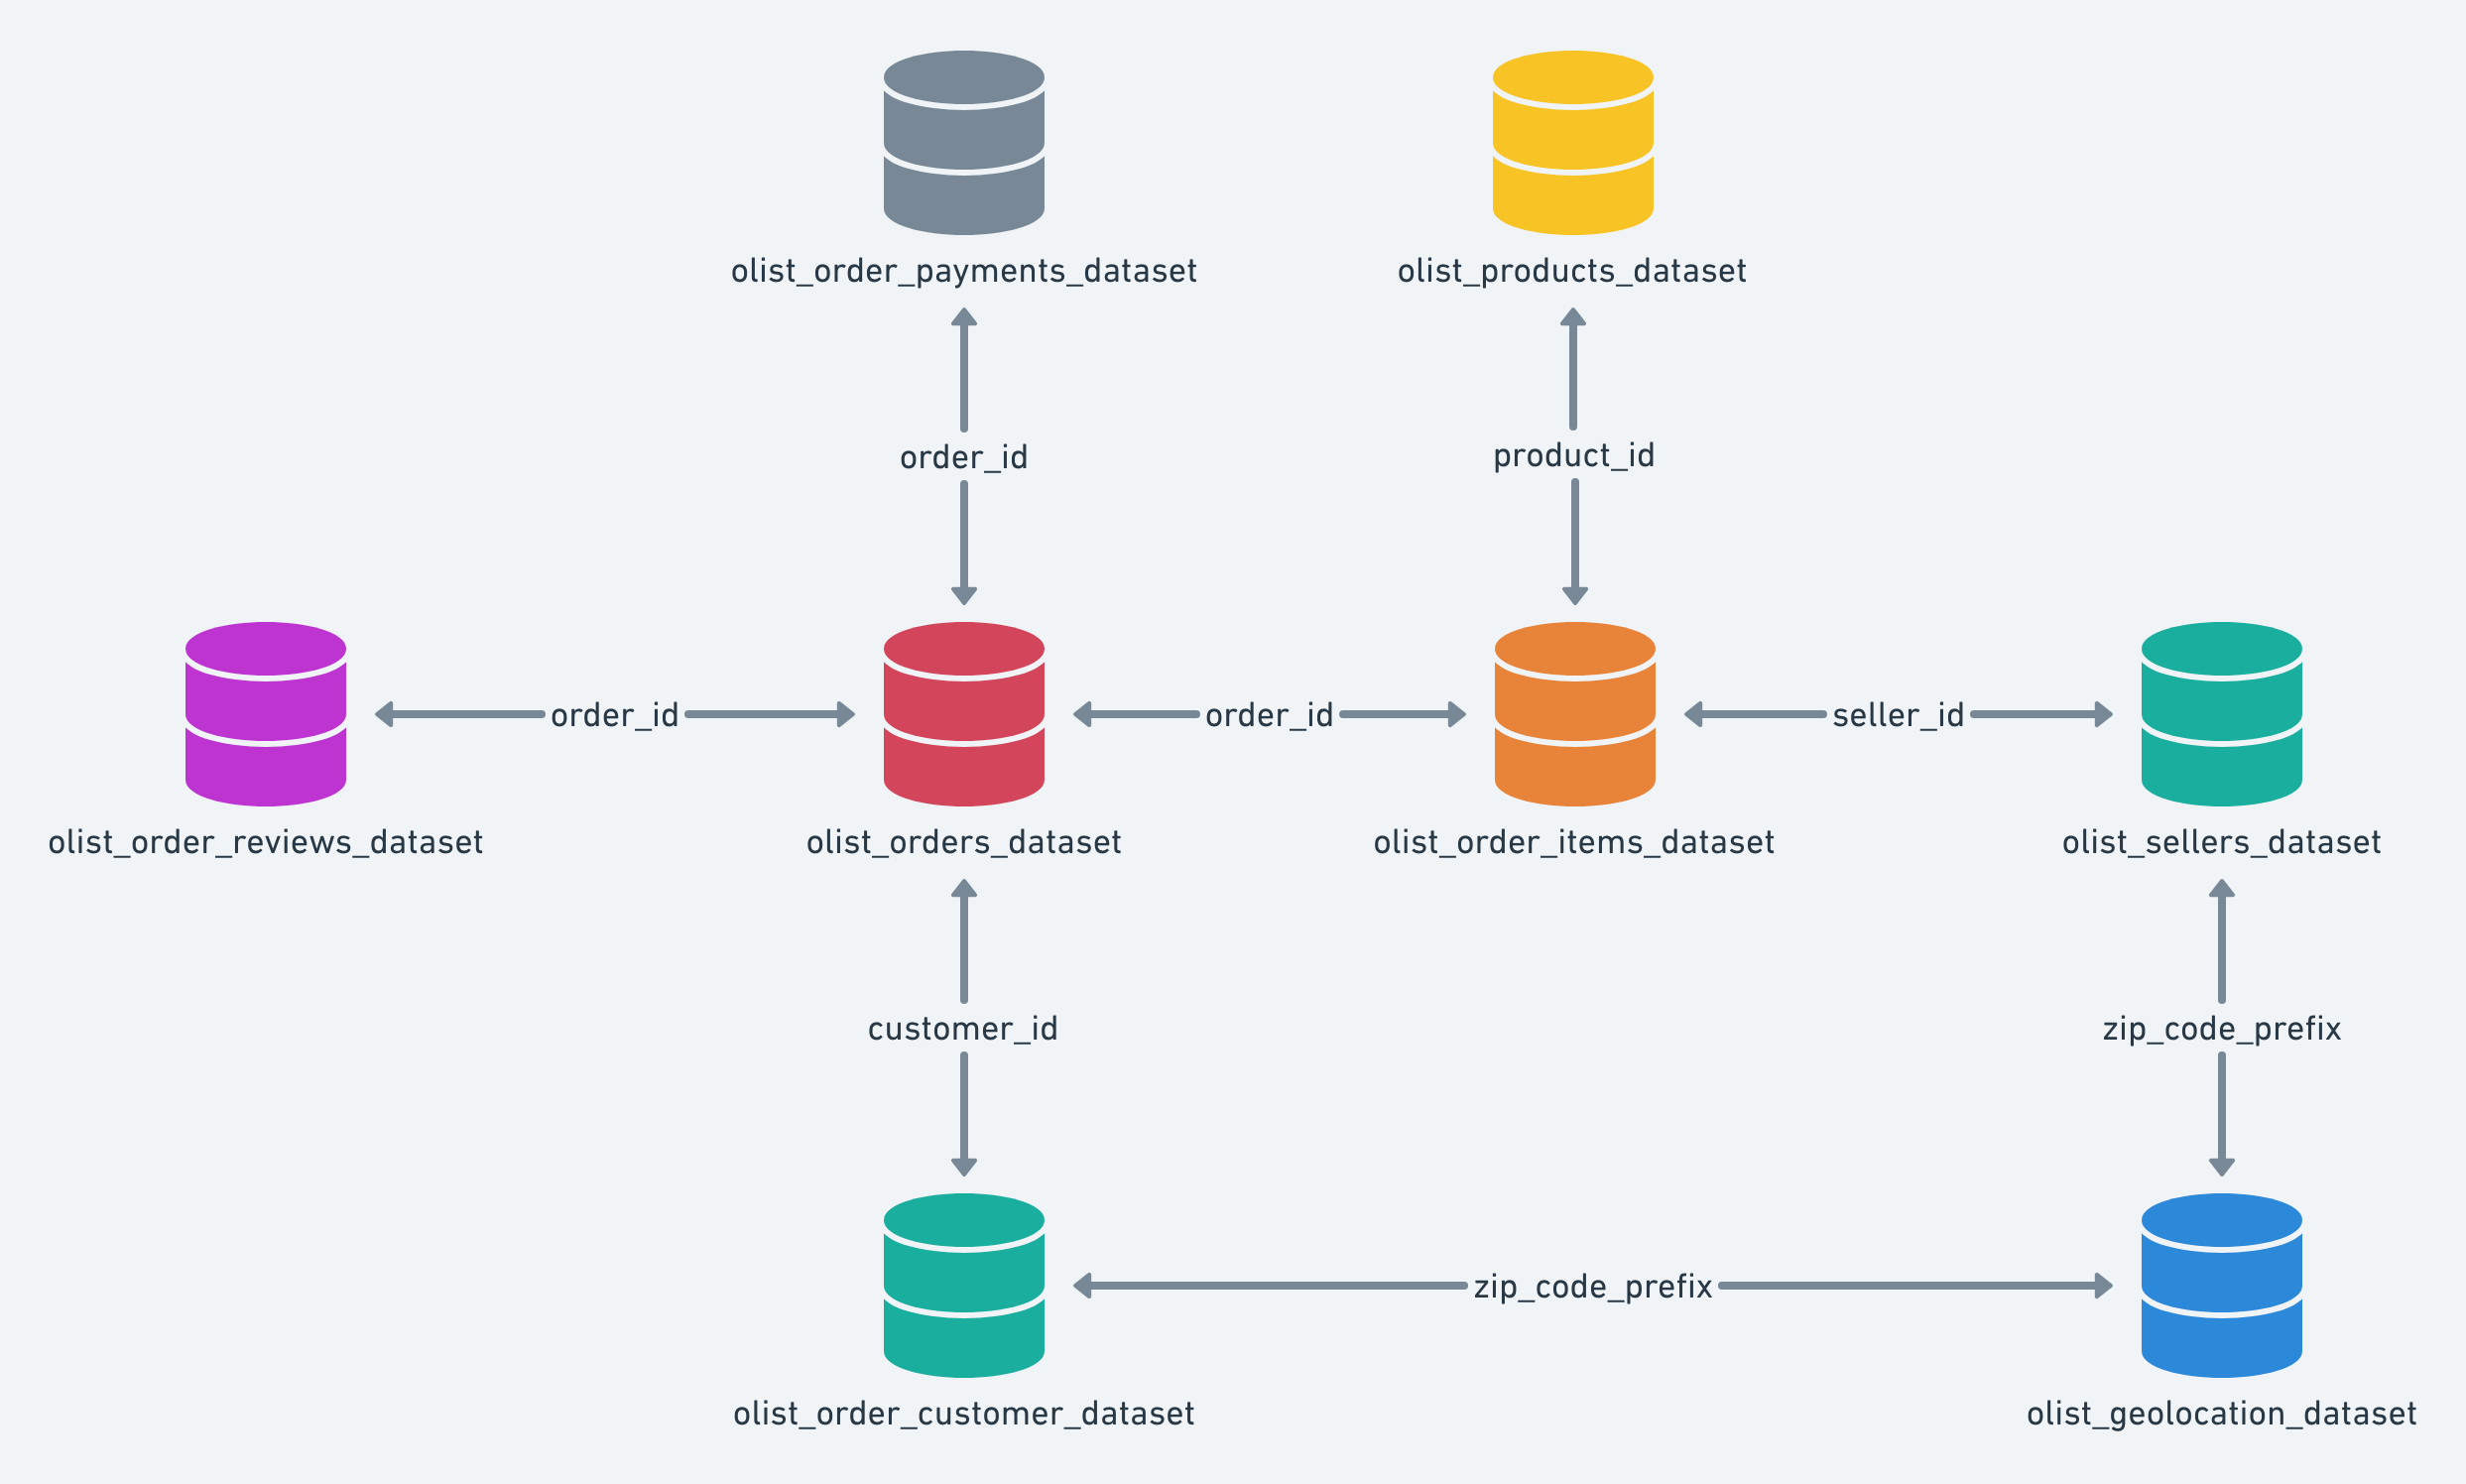

## <div class="alert alert-info"> 1. Importation des bibliothèques et chargement des données   : </div> 

###  <p style="color:green;"><b>1.1 Importation des bibliothèques   : </p><b>

In [230]:
# Installation : pip install flake8 pycodestyle pycodestyle_magic
%load_ext pycodestyle_magic

In [314]:
#%%flake8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


###  <p style="color:green;"><b>1.2 Chargement des données  : </p><b>

#####  1. Dataset Customers : 

In [315]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [316]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [317]:
customers.shape

(99441, 5)

##### 2. Dataset geolocalisation  : 

In [318]:
geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')

In [319]:
geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [320]:
geolocalisation.shape

(1000163, 5)

##### 3. Dataset order_items : 

In [321]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


* Shipping_limit_date: la date limite d’expédition du vendeur pour le traitement de la commande au partenaire logistique.
* price : prix de l'article 
* freight value : article de valeur de fret d’article (si une commande contient plus d’un article, la valeur de fret est répartie entre les aricles

In [322]:
order_items.shape

(112650, 7)

In [323]:
order_items.shape

(112650, 7)

##### 4. Dataset order_payments  : 

In [324]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')

In [325]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


* un client peut payer une commande avec plus d’un mode de paiement. S’il le fait, une séquence sera créée pour accueillir tous
* payment_installments : nombre de versements choisis par le client.
* payment_value : valeur transactionnelle 

In [326]:
order_payments.shape

(103886, 5)

##### 5 . Dataset order_reviews : 

In [327]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [328]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [329]:
order_reviews.shape

(99224, 7)

##### 6. Orders Dataset : 

In [330]:
orders_dataset = pd.read_csv('olist_orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


* order_purchase_timestamp: Affiche l’horodatage de l’achat.
* order_approved_at :Affiche l’horodatage d’approbation de paiement.
* order_delivered_carrier_date  : Affiche l’horodatage de validation de la commande. Quand il a été traité au partenaire logistique.
* order_delivered_customer_date : Affiche la date de livraison réelle de la commande au client.
* order_estimated_delivery_date : Affiche la date de livraison estimée qui a été informée au client au moment de l’achat.


In [331]:
orders_dataset.duplicated().sum()

0

In [332]:
orders_dataset.shape

(99441, 8)

##### 7 . Product Dataset : 

In [333]:
product_dataset = pd.read_csv('olist_products_dataset.csv')

In [334]:
product_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [335]:
product_dataset.duplicated().sum()

0

In [336]:
product_dataset.shape

(32951, 9)

##### 8. Sellers Dataset : 

In [337]:
sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')

In [338]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [339]:
sellers_dataset.shape

(3095, 4)

In [340]:
sellers_dataset.duplicated().sum()

0

##### 9 . Product Translation :

In [341]:
product_category_name = pd.read_csv('product_category_name_translation.csv')
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [342]:
product_category_name.duplicated().sum()

0

In [343]:
product_category_name.shape

(71, 2)

###  <p style="color:green;"><b>1.3 Description générale des données   : </p><b>

In [344]:
#%%flake8 

list_data = [customers, geolocalisation, order_items, order_payments,
             order_reviews, orders_dataset,
             product_dataset, sellers_dataset, product_category_name]


def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

In [345]:
#%%flake8


def dimesnion_df(list_data):
    for i in list_data:
        print('-'*60)
        print('La dimension de la dataframe {} est : \n{}'.
              format(get_df_name(i), i.shape))

In [346]:
dimesnion_df(list_data)

------------------------------------------------------------
La dimension de la dataframe customers est : 
(99441, 5)
------------------------------------------------------------
La dimension de la dataframe geolocalisation est : 
(1000163, 5)
------------------------------------------------------------
La dimension de la dataframe order_items est : 
(112650, 7)
------------------------------------------------------------
La dimension de la dataframe order_payments est : 
(103886, 5)
------------------------------------------------------------
La dimension de la dataframe order_reviews est : 
(99224, 7)
------------------------------------------------------------
La dimension de la dataframe orders_dataset est : 
(99441, 8)
------------------------------------------------------------
La dimension de la dataframe product_dataset est : 
(32951, 9)
------------------------------------------------------------
La dimension de la dataframe sellers_dataset est : 
(3095, 4)
-------------------

In [347]:
#%%flake8
def duplicated_NaN_per_df(list):
    for i in list:
        print('-'*60)
        print('Le nombre des données dupliquées dans la dataframe {} est: {}'
              .format(get_df_name(i), i.duplicated().sum()))
        percent_nan = ((i.isnull().sum().sum())/(i.shape[0]*i.shape[1]))*100
        print('Le pourcentage des NAN dans la dataframe {} est:{}'
              .format(get_df_name(i), percent_nan))

In [348]:
duplicated_NaN_per_df(list_data)

------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe customers est: 0
Le pourcentage des NAN dans la dataframe customers est:0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe geolocalisation est: 261831
Le pourcentage des NAN dans la dataframe geolocalisation est:0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe order_items est: 0
Le pourcentage des NAN dans la dataframe order_items est:0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe order_payments est: 0
Le pourcentage des NAN dans la dataframe order_payments est:0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe order_reviews est: 0
Le pourcentage des NAN dans la dataframe order_reviews est:21.006294560071872
------

In [349]:
#%%flake8
def duplicated_NaN_per_df(list):
    for i in list:
        print('-'*60)
        print('Le nombre des données dupliquées dans la dataframe {} est: {}'.
              format(get_df_name(i), i.duplicated().sum()))
        print('\n')
        percent_nan = i.isnull().sum().sum() / (len(i) * len(i.columns)) * 100
        percent_nan = round(percent_nan, 2)
        print('Le pourcentage des NAN dans la dataframe {} est: {}'
              .format(get_df_name(i), percent_nan))

In [350]:
duplicated_NaN_per_df(list_data)

------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe customers est: 0


Le pourcentage des NAN dans la dataframe customers est: 0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe geolocalisation est: 261831


Le pourcentage des NAN dans la dataframe geolocalisation est: 0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe order_items est: 0


Le pourcentage des NAN dans la dataframe order_items est: 0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe order_payments est: 0


Le pourcentage des NAN dans la dataframe order_payments est: 0.0
------------------------------------------------------------
Le nombre des données dupliquées dans la dataframe order_reviews est: 0


Le pourcentage des NAN dans la dataframe order_reviews est: 21.01
----

In [351]:
#%%flake8
def duplicated_NaN_per_column(list):
    for i in list:
        print('-'*60)
        print('Le % des NAN pour chaque colonne de la dataframe {} est:\n{}'
              .format(get_df_name(i), i.isnull().sum()))

In [353]:
duplicated_NaN_per_column(list_data)

------------------------------------------------------------
Le % des NAN pour chaque colonne de la dataframe customers est:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
------------------------------------------------------------
Le % des NAN pour chaque colonne de la dataframe geolocalisation est:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
------------------------------------------------------------
Le % des NAN pour chaque colonne de la dataframe order_items est:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
------------------------------------------------------------
Le % des NAN pour chaque co

#####  Description des Dataframes : 

Le jeu de données comporte 9 dataframes . Ci-aprés une description de chacune d'elle.
* customers : Cet ensemble de données contient des informations sur le client et son emplacement. chaque commande est attribuée à un identifiant clientunique. Cela signifie qu’un même client obtiendra des identifiants différents pour différentes commandes. Le but d’avoir un clientunique_id sur l’ensemble de données est de vous permettre d’identifier les clients qui ont effectué des rachats en magasin.
* Geolocalisation : Cet ensemble de données contient des informations sur les codes postaux brésiliens et ses coordonnées lat/lng.
* orders_dataset : Il s’agit de l’ensemble de données de base. De chaque commande, vous pouvez trouver toutes les autres informations.
* order_item : Cet ensemble de données comprend des données sur les articles achetés dans chaque commande.
* product_dataset : Cet ensemble de données comprend des données sur les produits vendus par Olist.
* order_reviews : Cet ensemble de données comprend des données sur les avis effectués par les clients.Une fois qu’un client a acheté le produit sur Olist Store, un vendeur est averti pour exécuter cette commande. Une fois que le client reçoit le produit, ou que la date de livraison estimée est due, le client reçoit une enquête de satisfaction par e-mail où il peut donner une note pour l’expérience d’achat et écrire quelques commentaires.
* order_payments : Cet ensemble de données comprend des données sur les options de paiement des commandes.
* sellers : Cet ensemble de données comprend des données sur les vendeurs qui ont exécuté les commandes passées chez Olist. Utilisez-le pour trouver l’emplacement du vendeur et pour identifier quel vendeur a rempli chaque produit.
* product_name_traduction : Traduit le nom de lacatégoriede produit en anglais.

###  <p style="color:green;"><b>1.4 Assemblage des données   : </p><b>

###### Assembale de la table client et la table commande :

In [354]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [355]:
orders_dataset.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [356]:
orders_dataset.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [357]:
orders_dataset.drop(columns=['order_delivered_carrier_date','order_estimated_delivery_date'] , inplace=True)
orders_dataset= orders_dataset[~(orders_dataset['order_delivered_customer_date'].isna())]
orders_dataset= orders_dataset[~(orders_dataset['order_approved_at'].isna())]

In [358]:
data  = customers.merge(orders_dataset, on ='customer_id')

In [359]:
data.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-29 12:41:19


In [360]:
data.shape

(96462, 10)

In [361]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
dtype: int64

###### Assembale avec la table article_commande  :

In [362]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [363]:
data = data.merge(order_items , on ='order_id')

In [364]:
data.shape

(110181, 16)

In [365]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

###### Assembale avec la table produit  :

In [366]:
product_dataset.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [367]:
product_dataset.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [368]:
product_dataset.drop(columns=['product_name_lenght','product_description_lenght', 'product_photos_qty',
                              'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)
product_dataset= product_dataset[~(product_dataset['product_category_name'].isna())]

In [369]:
data = data.merge(product_dataset, on ='product_id')
data.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio


In [370]:
data.isnull().sum().sum()

0

###### Assembale avec la table revue :

In [371]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [372]:
order_reviews.shape

(99224, 7)

In [373]:
order_reviews = order_reviews.drop(columns=['review_comment_title' , 'review_comment_message'])

In [374]:
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [375]:
data = data.merge(order_reviews , on = 'order_id')

###### Assembale avec la table paiement  :

In [376]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [377]:
order_payments.shape

(103886, 5)

In [378]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [379]:
data= data.merge(order_payments, on ='order_id')
data.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,...,freight_value,product_category_name,review_id,review_score,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,...,21.88,moveis_escritorio,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,...,24.90,moveis_escritorio,7fc63200f12eebb5f387856afdd63db8,1,2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79


In [380]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

###### Assembale avec la table vendeurs  :

In [381]:
sellers_dataset.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [382]:
sellers_dataset.shape

(3095, 4)

In [383]:
data.shape

(113218, 25)

In [384]:
data = data.merge(sellers_dataset , on ='seller_id')

In [385]:
data.shape

(113218, 28)

In [386]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

###### Assembale avec la table categorie produit  :

In [387]:
product_category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [388]:
data.product_category_name.nunique()

73

In [389]:
data= data.merge(product_category_name, on ='product_category_name')
data.shape

(113195, 29)

In [180]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_nam

In [181]:
data.shape

(113195, 29)

###### Sauvegarde intermédiaire : 

In [390]:
data.to_csv('dataAssemblee.csv', index=False)

## <div class="alert alert-info"> 2. Exploration des données   : </div> 

###### Types des variables : 

In [391]:
data.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_customer_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value   

###### Nombre des valeurs manquantes par colonne : 

In [392]:
data.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_nam

###### Modification de certaines colonnes : 

######  Traitement de la commance product_category_name : 

In [393]:
#%%flake8
data.drop(columns='product_category_name', inplace=True)

product_categories_dict = {
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',

    'furniture_bedroom': 'furniture',
    'furniture_decor': 'furniture',
    'furniture_living_room': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'bed_bath_table': 'furniture',
    'kitchen_dining_laundry_garden_furniture': 'furniture',
    'office_furniture': 'furniture',

    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'flowers': 'home',
    'cool_stuff': 'home',
    'drinks': 'food_drink',
    'food': 'food_drink',
    'food_drink': 'food_drink',
    'la_cuisine': 'food_drink',

    'electronics': 'electronics',
    'audio': 'electronics',
    'tablets_printing_image': 'electronics',
    'telephony': 'electronics',
    'fixed_telephony': 'electronics',
    'small_appliances': 'electronics',
    'small_appliances_home_oven_and_coffee': 'electronics',
    'computers_accessories': 'electronics',
    'computers': 'electronics',
    
    'sports_leisure': 'sports_leisure',
    'consoles_games': 'sports_leisure',
    'musical_instruments': 'sports_leisure',
    'toys': 'sports_leisure',
    'cine_photo': 'sports_leisure',
    'dvds_blu_ray': 'sports_leisure',
    'cds_dvds_musicals': 'sports_leisure',
    'music': 'sports_leisure',
    'books_general_interest': 'sports_leisure',
    'books_imported': 'sports_leisure',
    'books_technical': 'sports_leisure',

    'health_beauty': 'health_beauty',
    'perfumery': 'health_beauty',
    'diapers_and_hygiene': 'health_beauty',
    'baby': 'health_beauty',

    'christmas_supplies': 'supplies',
    'stationery': 'supplies',
    'party_supplies': 'supplies',
    'auto': 'supplies',
    'luggage_accessories': 'supplies',

    'watches_gifts': 'gifts',

    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc',
}


print(data.product_category_name_english.nunique())
data['product_category_name_english'] =data['product_category_name_english'].replace(product_categories_dict)
print(data.product_category_name_english.nunique())

data.rename(columns={'product_category_name_english':'product_category_name'},
            inplace=True)

71
11


######  Suppression des colonnes inutiles : 

In [394]:
#%%flake8
data.drop(columns=['order_approved_at','review_creation_date' ,'review_answer_timestamp','seller_city','seller_state'], inplace=True)

In [395]:
#%%flake8
data.drop(columns=['customer_zip_code_prefix', 'seller_zip_code_prefix',
                   'review_id'], inplace=True)

In [396]:
data.shape

(113195, 20)

###  <p style="color:green;"><b>2.1 Analyse univariée   : </p><b>

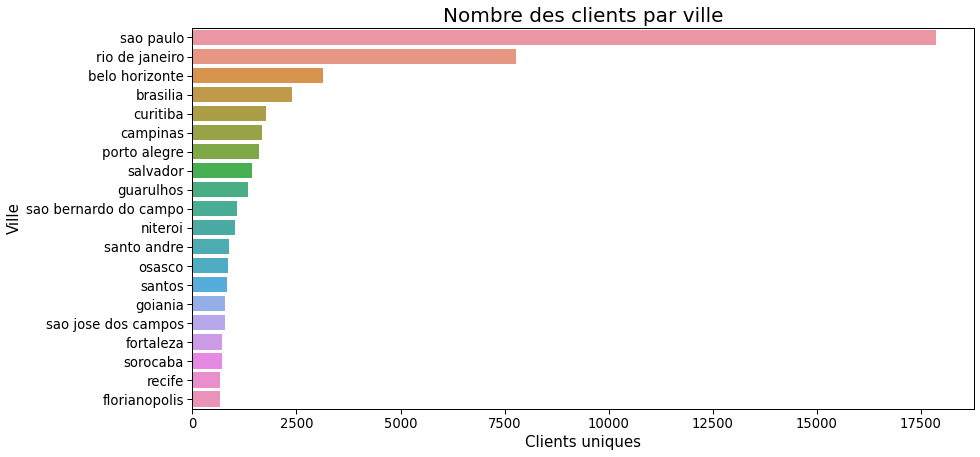

In [397]:
#%%flake8
fig = plt.figure(figsize=(14, 7))
customersByCity = data.groupby('customer_city')['customer_unique_id'].count()
customersByCity = customersByCity.sort_values(ascending=False).reset_index()
customersByCity = customersByCity.head(20)
sns.barplot(data=customersByCity, x='customer_unique_id', y='customer_city')
plt.title('Nombre des clients par ville', fontsize=20)
plt.xlabel('Clients uniques', fontsize=15)
plt.ylabel('Ville', fontsize=15)
plt.show()

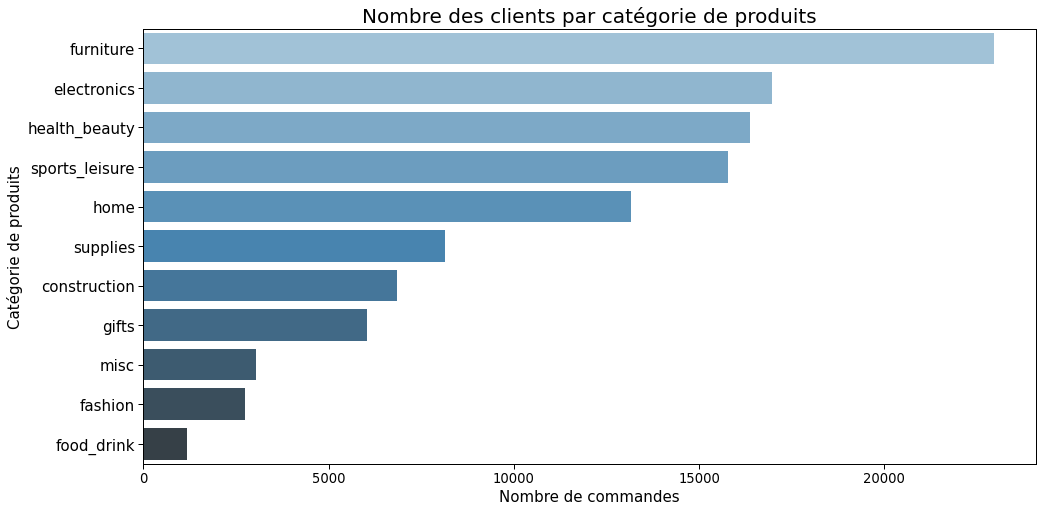

In [398]:
##%%flake8
fig = plt.figure(figsize=(16, 8))
orderByProduct = data.groupby('product_category_name')['order_id'].count()
orderByProduct = orderByProduct.sort_values(ascending=False).reset_index()
orderByProduct = orderByProduct.head(11)
sns.barplot(data=orderByProduct, x='order_id',
            y='product_category_name', palette="Blues_d")
plt.title('Nombre des clients par catégorie de produits', fontsize=20)
plt.xlabel('Nombre de commandes', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Catégorie de produits', fontsize=15)
plt.show()

* order_purchase_timestamp : Affiche l’horodatage de l’achat.
* order_delivered_customer_date :Affiche la date de livraison réelle de la commande au client.

In [399]:
print(data.order_purchase_timestamp.dtype)
data.order_purchase_timestamp= pd.to_datetime(data.order_purchase_timestamp)
data.order_delivered_customer_date = pd.to_datetime(data.order_delivered_customer_date)
print(data.order_delivered_customer_date)

object
0        2017-05-25 10:35:35
1        2017-11-28 00:09:50
2        2017-11-28 00:09:50
3        2017-05-26 09:54:04
4        2018-02-28 21:09:00
                 ...        
113190   2017-06-03 09:20:19
113191   2018-04-06 22:05:04
113192   2017-09-05 21:42:35
113193   2017-08-09 20:38:07
113194   2017-08-09 20:38:07
Name: order_delivered_customer_date, Length: 113195, dtype: datetime64[ns]


In [427]:
#%%flake8
data['dureeAchatLivraison'] = (data.order_delivered_customer_date - data.order_purchase_timestamp).dt.days
top_product = ['furniture', 'electronics', 'health_beauty',
               'sports_leisure', 'home', 'supplies', 'construction',
               'gifts', 'misc', 'fashion', 'food_drink']
df = data[data['product_category_name'].isin(top_product)]


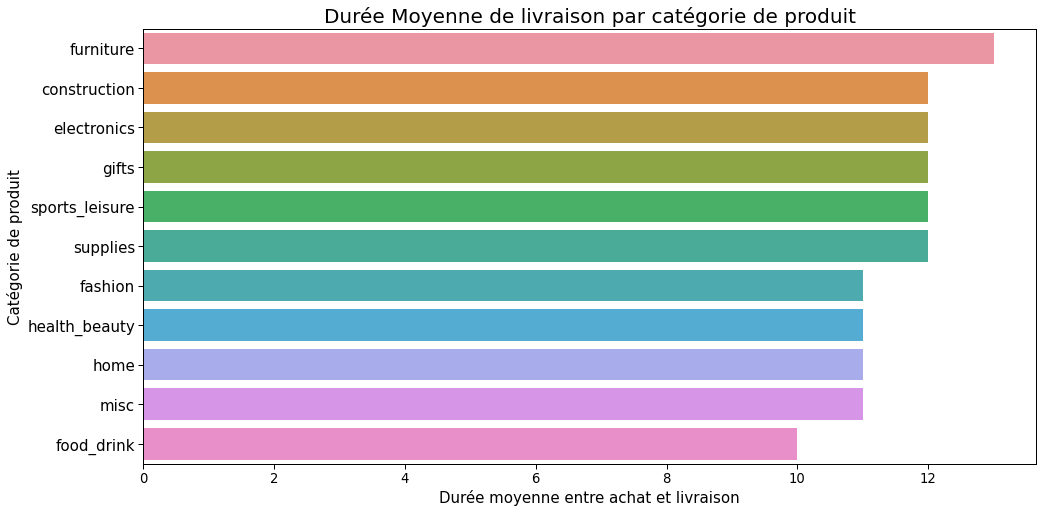

In [428]:
#%%flake8
fig = plt.figure(figsize=(16, 8))
productDeadline = df.groupby('product_category_name')['dureeAchatLivraison'].mean().round(0)
productDeadline = productDeadline.reset_index().sort_values(by='dureeAchatLivraison', ascending=False)
sns.barplot(data=productDeadline, y='product_category_name', x='dureeAchatLivraison')
plt.title('Durée Moyenne de livraison par catégorie de produit', fontsize=20)
plt.xlabel('Durée moyenne entre achat et livraison', fontsize=15)
plt.ylabel('Catégorie de produit', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

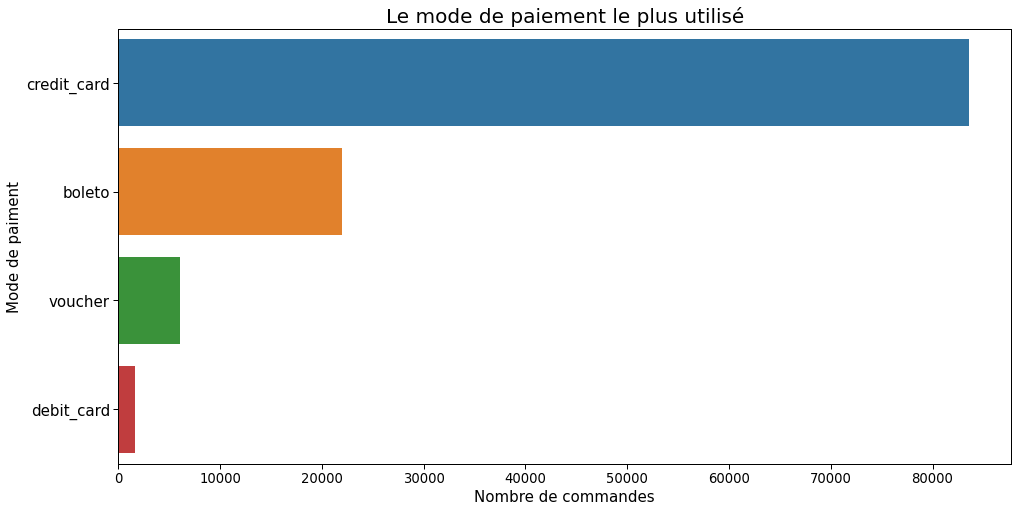

In [402]:
#%%flake8
fig = plt.figure(figsize=(16, 8))
paymentType = data.groupby('payment_type')['order_id'].count().sort_values(ascending=False).reset_index()
sns.barplot(data=paymentType, x='order_id', y='payment_type')
plt.title('Le mode de paiement le plus utilisé', fontsize=20)
plt.xlabel('Nombre de commandes', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Mode de paiment', fontsize=15)
plt.show()

##### Autres Informatioins sur le jeu de données 

##### Nombre d'état(State) concernée par l'étude : 

In [403]:
data.customer_state.nunique()

27

##### Nombre de clients unique : 

In [404]:
data.customer_unique_id.nunique()

91467

##### Nombre de commande : 

In [405]:
data.order_id.nunique()

94473

##### Nombre de vendeurs : 

In [406]:
data.seller_id.nunique()

2907

##### Nombre moyen de clients par vendeurs : 

In [407]:
#%%flake8
data.groupby('seller_id')['customer_unique_id'].count().mean()

38.93876848985208

##### La premiere commande effectuée sur le site : 

In [408]:
data.order_purchase_timestamp.min()

Timestamp('2016-10-03 09:44:50')

In [409]:
data.order_purchase_timestamp.max()

Timestamp('2018-08-29 15:00:37')

##### Distribution des variables quantitatives : 

In [410]:
#%%flake8
numeric_data = data.select_dtypes(['int64', 'float64'])
no_numeric_data = data.select_dtypes(exclude=['int64', 'float64'])


print("Nombre des colonnes numériques: ", len(numeric_data.columns))
print("Nombre des colonnes non numériques: ", len(no_numeric_data.columns))

Nombre des colonnes numériques:  8
Nombre des colonnes non numériques:  13


In [204]:
numeric_data2= numeric_data

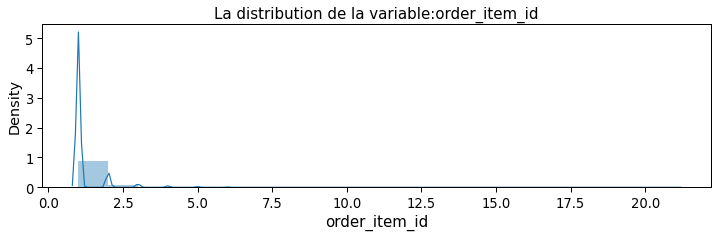

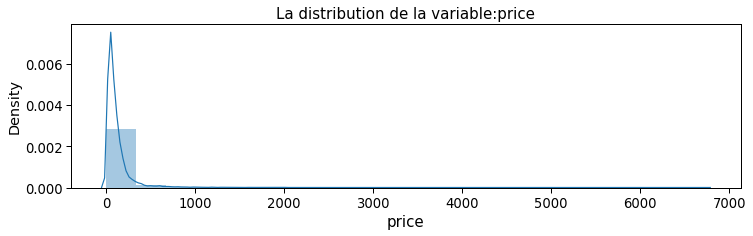

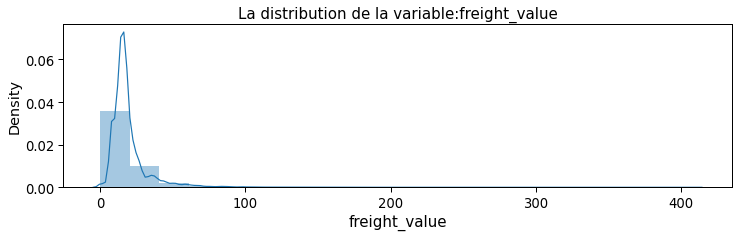

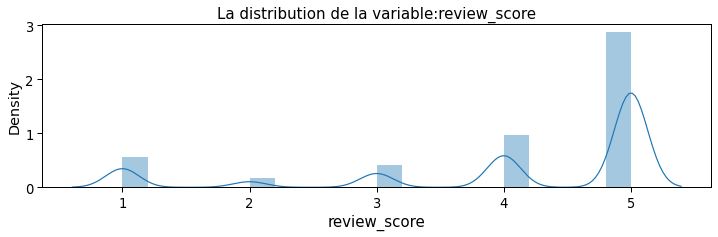

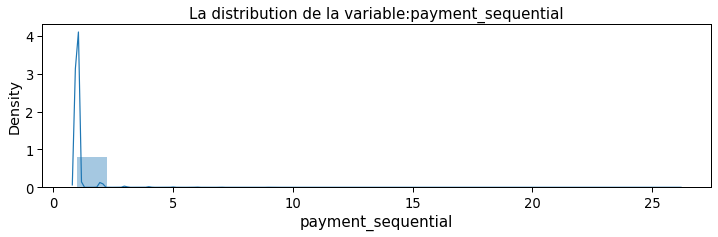

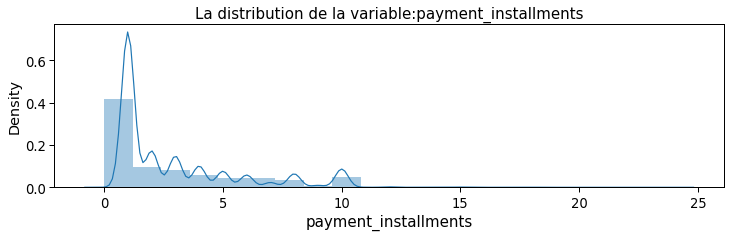

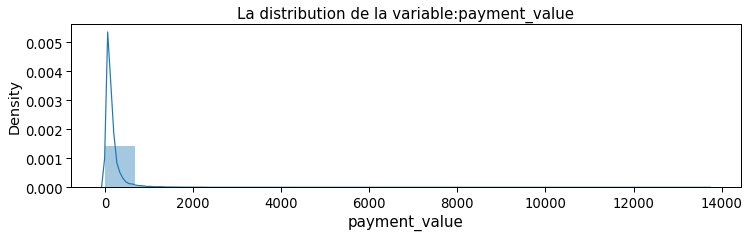

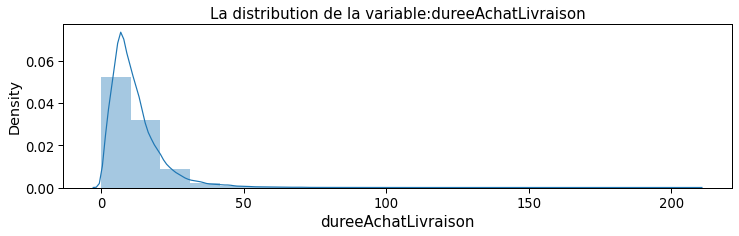

In [411]:
#%%flake8
for i in numeric_data2.columns:
    fig = plt.figure(figsize=(12, 3))
    sns.distplot(numeric_data2[i], bins=20)
    plt.title('La distribution de la variable:{}'.format(i), fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.show()

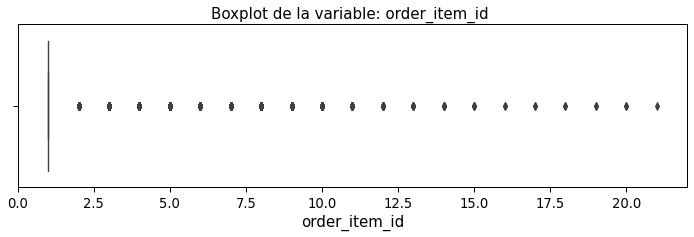

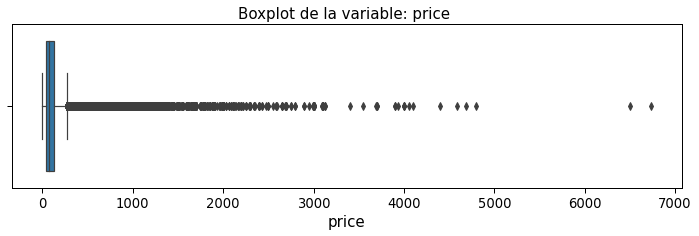

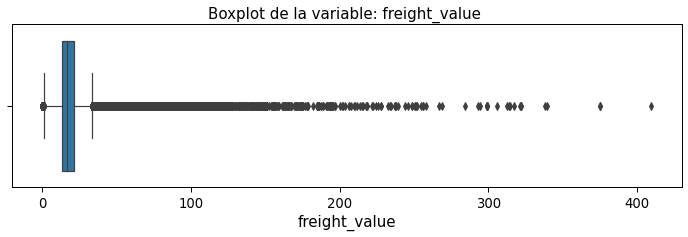

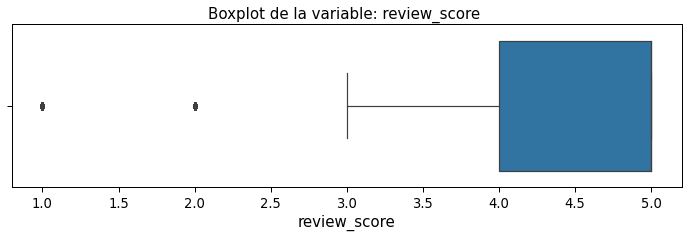

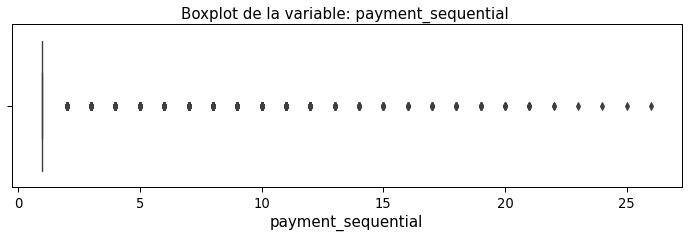

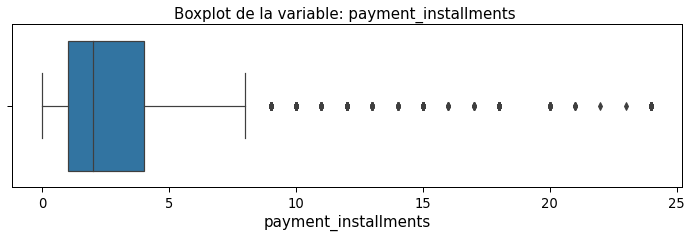

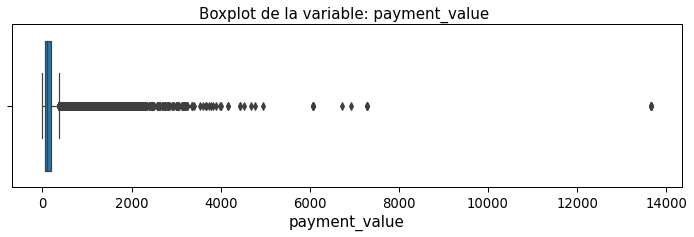

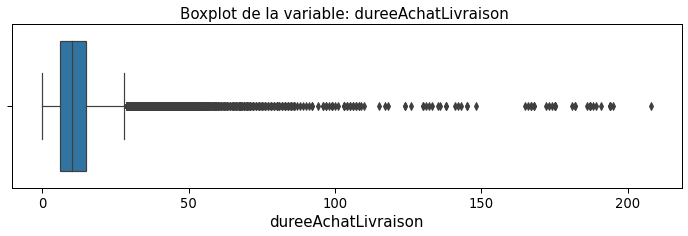

In [412]:
#%%flake8
for i in numeric_data2.columns:
    fig = plt.figure(figsize=(12, 3))
    sns.boxplot(numeric_data2[i])
    plt.title('Boxplot de la variable: {} '.format(i), fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.show()

###  <p style="color:green;"><b>2.2 Analyse bivariée : </p><b>

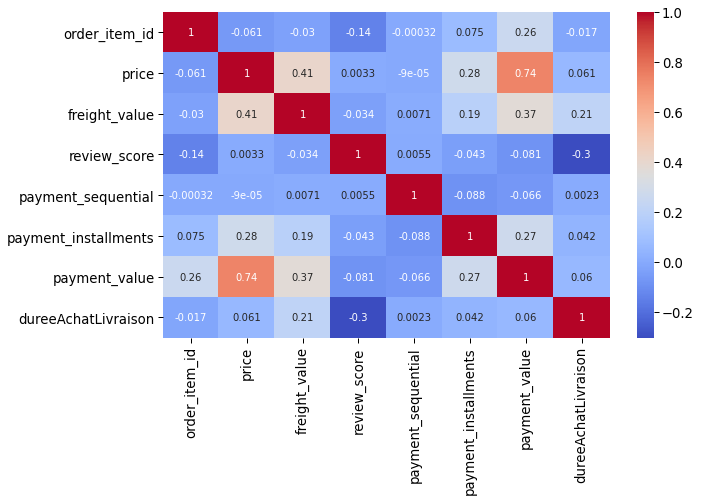

In [207]:
#%%flake8
fig = plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data2.corr(), annot=True, cmap='coolwarm')
plt.show()

###  <p style="color:green;"><b>2.3 Analyse multivariée   : </p><b>

In [413]:
#%%flake8
numeric_data2 = data.select_dtypes(['int64', 'float64'])

data_pca = numeric_data2
colonnes_pca = data_pca.columns
colonnes_pca

Index(['order_item_id', 'price', 'freight_value', 'review_score',
       'payment_sequential', 'payment_installments', 'payment_value',
       'dureeAchatLivraison'],
      dtype='object')

In [414]:
# %%flake8
# Réduction et centrage des données:
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

data_pca

array([[-0.28371879,  0.02830018,  0.11949098, ..., -0.33956366,
        -0.09348776, -0.42474411],
       [-0.28371879, -0.03794039,  0.31170638, ..., -0.69937559,
         0.39438775,  0.64332009],
       [ 1.17078975, -0.03794039,  0.31170638, ..., -0.69937559,
         0.39438775,  0.64332009],
       ...,
       [-0.28371879,  0.10563605,  0.09275904, ...,  0.02024826,
        -0.04205875, -0.42474411],
       [-0.28371879,  0.05043557,  0.39317516, ..., -0.33956366,
        -0.44047275, -0.31793769],
       [-0.28371879,  0.05043557,  0.39317516, ..., -0.69937559,
        -0.27085919, -0.31793769]])

In [415]:
pca= PCA(n_components=2)

In [416]:
## Entraînement des données :
pca.fit(data_pca)

PCA(n_components=2)

In [417]:
pca.explained_variance_ratio_

array([0.28136972, 0.16253465])

In [418]:
pca.explained_variance_ratio_.cumsum()

array([0.28136972, 0.44390437])

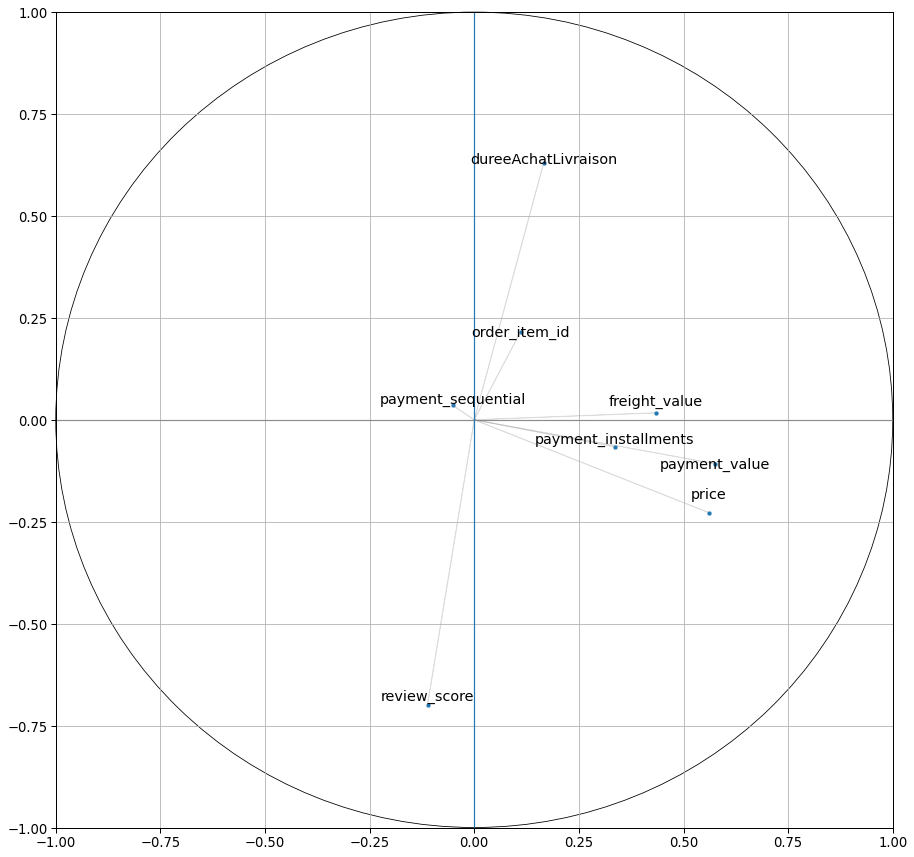

In [419]:
#%%flake8
plt.figure(figsize=(15, 15))
plt.grid(True)
sns.set_context("paper", font_scale=1.5)
ax = plt.gca()
# (matplotlib.patches.Patch), qui est la classe de base d'objets géométriques
ax.add_patch(Circle([0, 0], radius=1,
                    color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
x_pca = pca.components_[0, :]
y_pca = pca.components_[1, :]

sns.scatterplot(x_pca, y_pca)
plt.plot([-1, 1], [0, 0], color='grey', alpha=0.8)
plt.plot([0, 0], [-1, 1])
i = 0
for x, y, colonne in zip(x_pca, y_pca, colonnes_pca):
    plt.annotate(colonne,
                 (x, y),
                 textcoords="offset points",
                 xytext=(0, 5+np.random.randint(-10, 10)),
                 ha='center')
    ax.arrow(0, 0, x, y, head_width=0, head_length=0,
             fc='grey', ec='grey', alpha=0.2)

###  <p style="color:green;"><b>2.4 Traitement des outliers    : </p><b>

In [420]:
#%%flake8 
def delete_outliers(data):
    from sklearn.ensemble import IsolationForest
    contamination = 0.01
    model = IsolationForest(contamination=contamination, n_estimators=1000)
    data_numeric = data.select_dtypes(['int64', 'float64'])
    data_no_numeric = data.select_dtypes(exclude=['int64', 'float64'])
    model.fit(data_numeric)
    data_numeric["iforest"] = pd.Series(model.predict(data_numeric))
    data_numeric["iforest"] = data_numeric["iforest"].map({1: 0, -1: 1})
    print(data_numeric["iforest"].value_counts())
    idx = data_numeric[data_numeric['iforest'] == 0].index
    data = pd.concat([data_numeric.loc[idx], data_no_numeric.loc[idx]], axis=1)
    # data_numeric=data_numeric[~(data_numeric['iforest']==1)]
    return data


data = delete_outliers(data)

0    112063
1      1132
Name: iforest, dtype: int64


In [421]:
#%%flake8
data_numeric = data.select_dtypes(['int64', 'float64'])
data_no_numeric = data.select_dtypes(exclude=['int64', 'float64'])

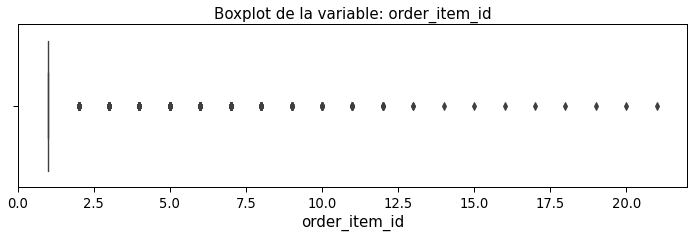

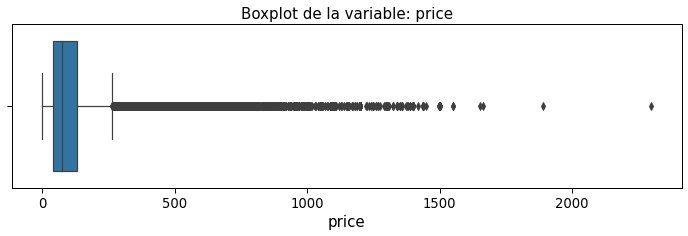

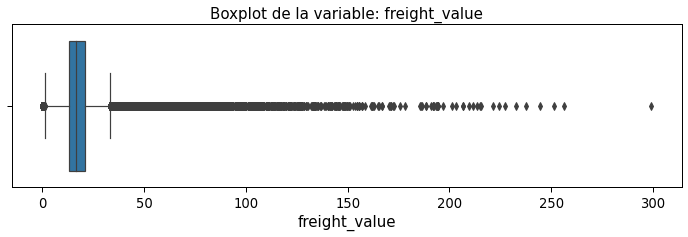

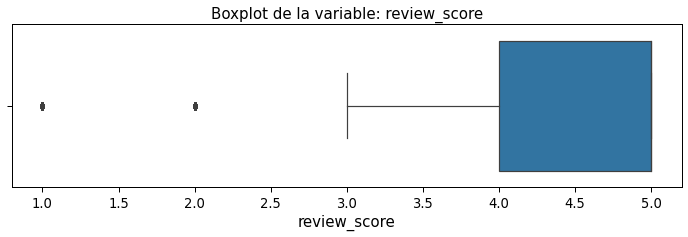

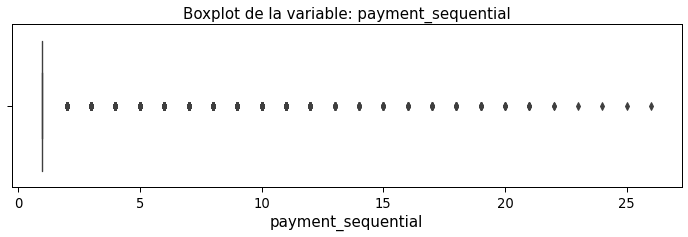

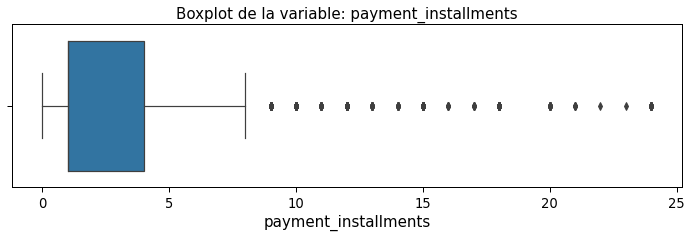

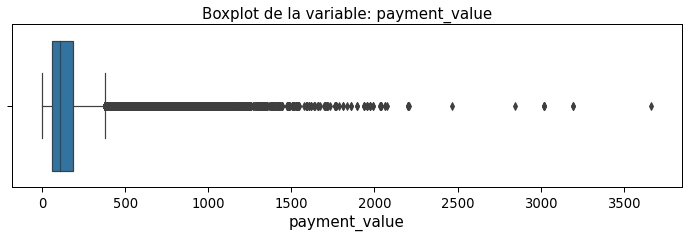

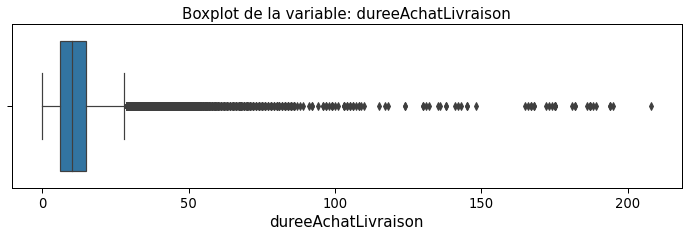

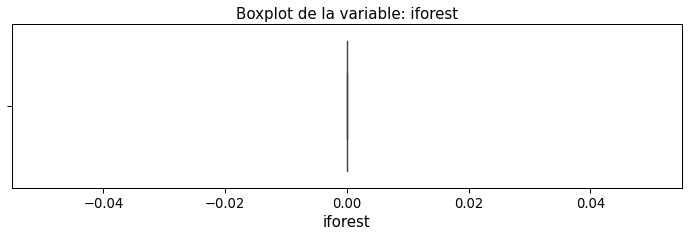

In [422]:
#%%flake8
for i in data_numeric.columns:
    fig = plt.figure(figsize=(12, 3))
    sns.boxplot(data_numeric[i])
    plt.title('Boxplot de la variable: {}'.format(i), fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.xlabel(i, fontsize=15)
    plt.show()